In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
# Import ImageDataGenerator from tf.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
training_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',target_size=(64,64),batch_size=32,class_mode='categorical'
)

Found 3115 images belonging to 36 classes.


In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1./255,

)
test_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',target_size=(64,64),batch_size=32,class_mode='categorical'
)

Found 359 images belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,791,460 (22.09 MB)

 Trainable params: 5,791,460 (22.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history=cnn.fit(x=training_set,epochs=15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 4/98 ━━━━━━━━━━━━━━━━━━━━ 22:23 14s/step - accuracy: 0.0495 - loss: 4.0580

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/98 ━━━━━━━━━━━━━━━━━━━━ 18:33 15s/step - accuracy: 0.0393 - loss: 3.7982

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import json
with open('training_hist.json','w') as f:
 json.dump(training_history.history,f)

In [ ]:
training_history.history['accuracy']

[0.41727691888809204,
 0.6421209573745728,
 0.6951451301574707,
 0.7302685379981995,
 0.7583401203155518,
 0.7809872627258301,
 0.7969894409179688,
 0.8058041930198669,
 0.8176023960113525,
 0.8257390856742859,
 0.8321128487586975,
 0.839435875415802,
 0.8479793667793274,
 0.8512340784072876,
 0.8600488305091858]

In [ ]:
training_history.history['accuracy'][-1]

0.8600488305091858

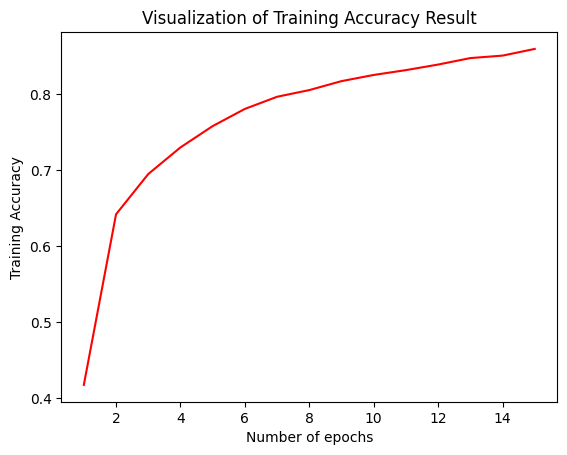

In [ ]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 16)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('Number of epochs')  # Corrected spelling of xlabel
plt.ylabel('Training Accuracy')  # Corrected spelling of ylabel
plt.title('Visualization of Training Accuracy Result')
plt.show()


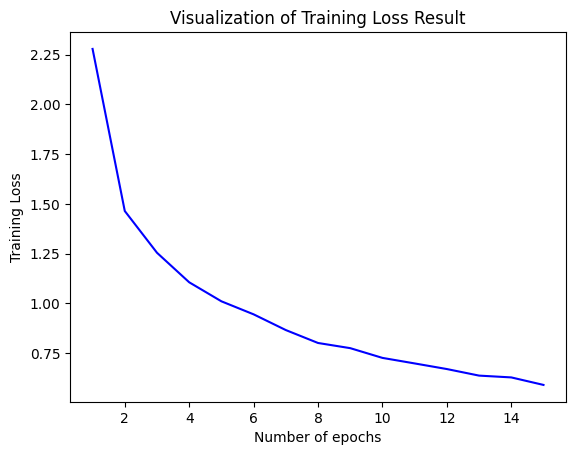

In [ ]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 16)]
plt.plot(epochs, training_history.history['loss'], color='blue')  # Changed 'accuracy' to 'loss'
plt.xlabel('Number of epochs')
plt.ylabel('Training Loss')
plt.title('Visualization of Training Loss Result')
plt.show()

28/28 [==============================] - 14s 494ms/step


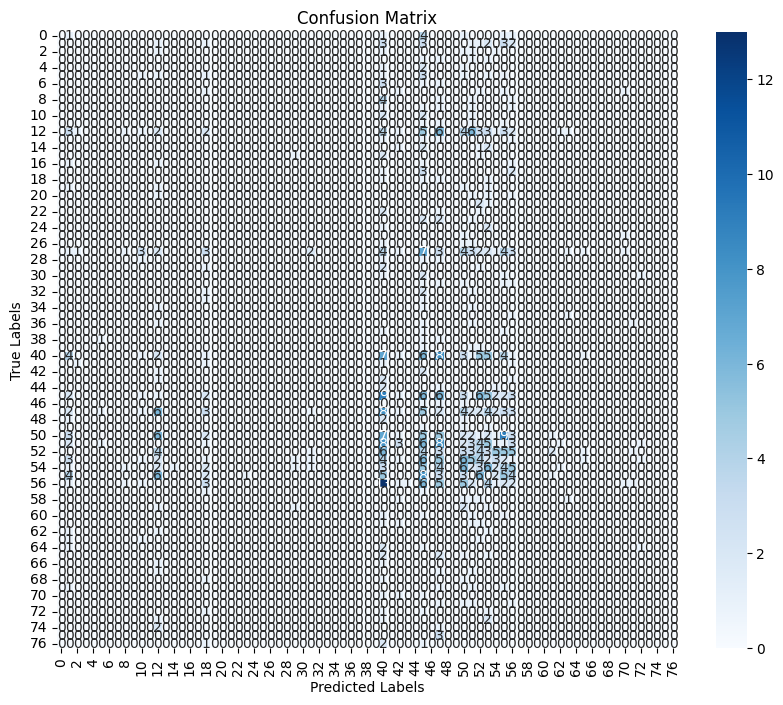

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the trained model
model = tf.keras.models.load_model('trained_model.h5')

# Predict the classes for the test set
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_set.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
training_loss,training_accuracy=cnn.evaluate(training_set)

231/231 [==============================] - 105s 452ms/step - loss: 0.4827 - accuracy: 0.8805


In [ ]:
test_loss,test_accuracy=cnn.evaluate(test_set)

28/28 [==============================] - 11s 386ms/step - loss: 1.5231 - accuracy: 0.6260


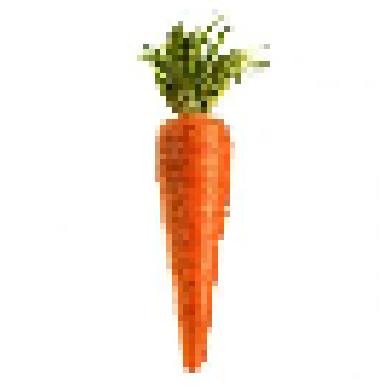

1/1 [==============================] - 0s 37ms/step


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and display the image
test_image_path = '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/tomato/Image_3.jpg'
test_image = image.load_img(test_image_path, target_size=(64, 64))
plt.imshow(test_image)
plt.axis('off')  # Turn off axis labels
plt.show()

# Convert the image to array and expand dimensions
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Perform prediction
result = cnn.predict(test_image_array)


In [ ]:
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [ ]:
predicted_class_index = np.argmax(result)
predicted_class = list(training_set.class_indices.keys())[predicted_class_index]
print("Predicted class:", predicted_class)


Predicted class: Carrot


In [ ]:
import pandas as pd

# Load the dataset
nutrition_df = pd.read_csv('/content/drive/MyDrive/nutrition_values.csv')

# Assuming 'Name' column in the dataset corresponds to the class names in your training set
# You can adjust this based on your actual dataset
class_name = predicted_class

# Extract the row corresponding to the predicted class
class_info = nutrition_df[nutrition_df['Name'] == class_name]

# Print the information for the predicted class
print("Name:", class_info['Name'].values[0])
print("Calories (per 100g):", class_info['Calories (per 100g)'].values[0])
print("Carbohydrates (g):", class_info['Carbohydrates (g)'].values[0])
print("Protein (g):", class_info['Protein (g)'].values[0])
print("Fat (g):", class_info['Fat (g)'].values[0])
print("Fiber (g):", class_info['Fiber (g)'].values[0])
print("Vitamin C (mg):", class_info['Vitamin C (mg)'].values[0])
print("Zinc (mg):", class_info['Zinc (mg)'].values[0])
print("Potassium (mg):", class_info['Potassium (mg)'].values[0])
print("Iron (mg):", class_info['Iron (mg)'].values[0])
print("Calcium (mg):", class_info['Calcium (mg)'].values[0])

Name: Carrot
Calories (per 100g): 41
Carbohydrates (g): 10.0
Protein (g): 0.9
Fat (g): 0.2
Fiber (g): 2.8
Vitamin C (mg): 3.6
Zinc (mg): 0.2
Potassium (mg): 320
Iron (mg): 0.3
Calcium (mg): 33
